In [25]:
import time

# The CSP class defined below will use time for performance measurement

In [28]:
class CSP:
    def __init__(self, variable, domains, neighbors):

        self.variable = variable
        self.domains = domains
        self.neighbors = neighbors

        self.nodes_expanded = 0
        self.backtracks = 0
    

    def create_map_coloring_csp():

        variable = ['SP', 'RJ', 'MG', 'ES']

        domains = {var: ['Vermelho','Verde','Azul'] for var in variable}

        neighbors = {
            'SP': ['RJ','MG'],
            'RJ': ['SP','MG','ES'],
            'MG': ['SP','RJ','ES'],
            'ES': ['RJ','MG']
        }

        return CSP(variable,domains,neighbors)


    def backtracking_search(self, use_mrv= False):

        self.nodes_expanded = 0
        self.backtracks = 0

        start_time = time.time()
        solution = self._backtrack({}, use_mrv)
        end_time = time.time()

        return {
            'Solution': solution,
            'Time': end_time - start_time,
            'Nodes_Expanded': self.nodes_expanded,
            'Backtracks': self.backtracks
        }

    def _backtrack(self, assignment, use_mrv):

        if len(assignment) == len(self.variable):
            return assignment

        if use_mrv:
            var = self.mrv(assignment)
        else: 
            var = [v for v in self.variable if v not in assignment][0]

        self.nodes_expanded += 1

        for value in self.domains[var]:
            if self.is_consistent(var, value, assignment):
                assignment[var] = value

                result = self._backtrack(assignment, use_mrv)
                if result:
                    return result

                del assignment[var]
                self.backtracks += 1

        return None

    # Define consistency-check method and attach to CSP class

def is_consistent(self, var, value, assignment):
    """Return True if assigning `value` to `var` doesn't conflict with any
    already assigned neighbors (they must have different colors)."""
    for neighbor in self.neighbors.get(var, []):
        if neighbor in assignment and assignment[neighbor] == value:
            return False
    return True

# monkey-patch the method onto the CSP class
CSP.is_consistent = is_consistent

csp = CSP.create_map_coloring_csp()
#output = csp.backtracking_search(use_mrv=True)  # enable MRV heuristic for fun
# print("Solution:", output['Solution'])
# print("Time elapsed:", output['Time'])
# print("Nodes expanded:", output['Nodes_Expanded'])
# print("Backtracks:", output['Backtracks'])

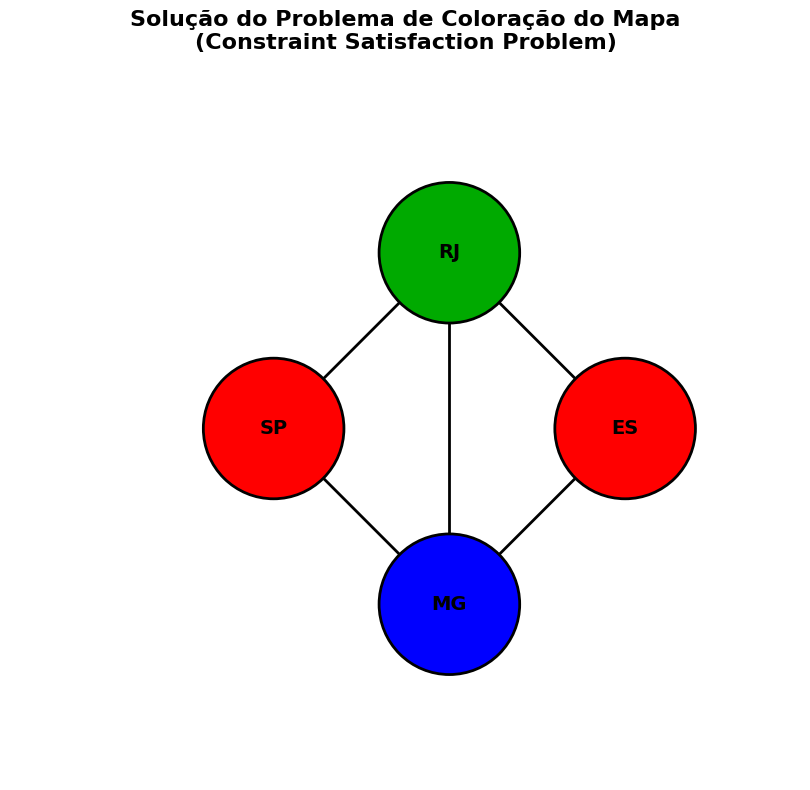

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Definir posições dos estados (coordenadas aproximadas do mapa)
posicoes = {
    'SP': (2, 3),
    'RJ': (3, 4),
    'MG': (3, 2),
    'ES': (4, 3)
}

# Mapear cores da solução
cores_mapa = {
    'Vermelho': '#FF0000',
    'Verde': '#00AA00',
    'Azul': '#0000FF'
}

# Obter estados e cores
states = list(output['Solution'].keys())
cores_solucao = [cores_mapa[output['Solution'][state]] for state in states]

# Criar figura
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Desenhar arestas (conexões entre estados)
for state, neighbors_list in csp.neighbors.items():
    for neighbor in neighbors_list:
        if state < neighbor:  # Evita desenhar a mesma aresta duas vezes
            x1, y1 = posicoes[state]
            x2, y2 = posicoes[neighbor]
            ax.plot([x1, x2], [y1, y2], 'k-', linewidth=2, zorder=1)

# Desenhar nós (estados) com as cores da solução
for i, state in enumerate(states):
    x, y = posicoes[state]
    circle = patches.Circle((x, y), 0.4, color=cores_solucao[i], ec='black', linewidth=2, zorder=2)
    ax.add_patch(circle)
    ax.text(x, y, state, fontsize=14, fontweight='bold', ha='center', va='center', zorder=3)

# Configurar o gráfico
ax.set_xlim(0.5, 5)
ax.set_ylim(1, 5)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Solução do Problema de Coloração do Mapa\n(Constraint Satisfaction Problem)', 
             fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()